e_charge = 1.60217662e-19 - заряд злектрона -1,602176634 * 10^19 [Кл]

В данном случае берем абсолютное значение для более простых вичислений и наглядных графиков

m_electron = 9.10938356e-31 - масса электрона [Кг]

mu_0 = 4 * np.pi * 1e-7 - магнитная проницаемость вакуума [Гн/м]

In [22]:
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Константы
e_charge = 1.60217662e-19
m_electron = 9.10938356e-31
mu_0 = 4 * np.pi * 1e-7

In [23]:
def electron_motion(y, t, U, B, m, e):
    x, y, vx, vy = y
    dvxdt = (e / m) * vy * B
    dvydt = -(e / m) * vx * B - (e / m) * U * vy / np.sqrt(vx ** 2 + vy ** 2)

    return [vx, vy, dvxdt, dvydt]

1) sol = odeint(electron_motion, [x0, y0, v0, 0], t, args=(U, B, m_electron, e_charge))

       x, y, vx, vy = y y - [x0, y0, v0, 0]


2) dvxdt = (e / m) * vy * B  - это уравнение Лоренца, которое описывает силу, действующую на заряженную частицу, движущуюся в магнитном поле.
    
       F_лоренца = q * v * B * sin(a), q - заряд, v - скорость, B вектор магнитной индукции, а - улог между v и B. У нас sin(a) = 1.
    
       По 2 З.Н. ∑F = ma, F = ma, F = q v B sin(a) => ma = q v B sin(a) => a = q/m v B sin(a), который у нас 1, тк V | B.  


3) dvydt = -(e / m) * vx * B - (e / m) * U * vy / np.sqrt(vx ** 2 + vy ** 2)

       Минусы тут - направление, по поводу остального: (e / m) * vx * B

       А (e / m) * U * vy / np.sqrt(vx ** 2 + vy ** 2)   E = F/q и qEd = qU.

       F = ma (II З.Н),
       F = Eq, F = ma => ma = Eq => a = (q/m)E ==(E = U/d)> a = (q/m)U/d,

       по Пифагору нашли расстояние d => (np.sqrt(vx ** 2 + vy ** 2)) => (e / m) * U / np.sqrt(vx ** 2 + vy ** 2).


In [24]:
def orbit_radius(I, U, n):
    B = mu_0 * n * I

    if B == 0:
        return

    return math.sqrt((m_electron * 2 * U)/(np.abs(e_charge) * (B ** 2)))

1) B = mu_0 * n * I
    
       B - магнитное поле внутри соленоида,
    
       mu_0 - магнитная проницаемость вакуума,

       n - число витков на единицу длины соленоида,
   
       I - ток через соленоид.

    Это уже готовая формула

    <p align="center">
    <img width="382" src="images/B.png" alt="qr"/>
    </p>

    [формула со studfile](https://studfile.net/preview/2953066/page:5/)

2) math.sqrt((m_electron * 2 * U)/(e_charge * (B ** 2)))
     


          F_центробежная = m w^2 r, где
          m - масса,
          w (омега) - угловая скорость,
          r - радиус.

   F_лоренца (была выше) = qvBsin(a)
   
   ### вывод

           F_ц = F_л
        
           Когда заряженная частица движется в магнитном поле, на нее действует сила Лоренца.
           Если частица движется перпендикулярно магнитному полю, эта сила вызывает центробежное движение, и частица начинает двигаться по круговой орбите.

           mw^2r = qvBsin(a)                           (sin(a) = 1, v = wr => w = v/r)

           m (v/r)^2 r = qvB                           ((v/r)^2 * r/v = v/r)

           m v/r = qB                                  (умножаем на r делим на qB)

           mv/qB = r                                   (v = sqrt( 2 * e/m * U), q = e)

           m * sqrt(2 *  e/m * U) / e B = r            (m = sqrt(m^2) и тд)

           sqrt(m^2 * 2 * e/m * U / (e^2 * B^2)) = r   (сокращаем m и e)

           sqrt(m * 2 * U / (e * B^2)) = r

   
          
           F_ц - центробежная сила [Н],
           m - масса [Кг],
           w (омега) - угловая скорость [рад/с],
           r - радиус [м],
           F_л - сила Лоренца [H],
           B - вектор магнитной индукции [Тл],
           q - заряд [Кл],
           v - скорость [м/с],
           e - заряд электрона [Кл],
           U - напрядение [В].

  

In [25]:
def simulate_and_plot(U, Ic, Rk, steps=1000, tmax=1e-6, stop_velocity=None):
    n = 100
    B = mu_0 * n * Ic


    x0 = Rk
    y0 = 0
    v0 = np.sqrt(2 * np.abs(e_charge) * U / m_electron)
    r_orbit = orbit_radius(Ic, U, n)


    omega = v0 / r_orbit


    t = np.linspace(0, tmax, steps)


    sol = odeint(electron_motion, [x0, y0, v0, 0], t, args=(U, B, m_electron, e_charge))


    if stop_velocity is not None:
        idx = np.where(np.sqrt(sol[:, 2] ** 2 + sol[:, 3] ** 2) <= stop_velocity)[0]
        if len(idx) > 0:
            sol = sol[:idx[0] + 1]


    plt.figure(figsize=(8, 6))
    plt.plot(sol[:, 0], sol[:, 1])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Траектория электрона')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.show()

    return r_orbit

In [26]:
def find_required_current_positive(Ra, Rk, n, U):
    r_orbit = (Ra - Rk) / 2
    if (r_orbit * e_charge * n * mu_0) == 0:
        return

    Ic_required = (m_electron * np.sqrt(2 * (e_charge / m_electron) * U)) / (r_orbit * e_charge * n * mu_0)

    return Ic_required


def find_required_current_negative(Ra, Rk, n, U):
    r_orbit = (Ra - Rk) / 2
    if (r_orbit * -e_charge * n * mu_0) == 0:
        return

    Ic_required = (m_electron * np.sqrt(2 * (-e_charge / m_electron) * U)) / (r_orbit * -e_charge * n * mu_0)

    return Ic_required

1) r_orbit = (Ra - Rk) / 2

       r_orbit = (Ra - Rk) / 2    (r_orbit - радиус орбиты электрона [м], Ra - радиус анода [м], Rk - радиус катода [м])

       Здесь вычисляется радиус орбиты электрона.
       Это половина разницы между радиусами анода и катода, так как электрон должен описывать окружность диаметром (Ra-Rk).

2) (r_orbit * e_charge * n * mu_0) == 0

       Это проверка на ноль в знаменателе следующей формулы.
       Если это выражение равно нулю, функция возвращает None, чтобы избежать деления на ноль.

3) Ic_required = (m_electron * math.sqrt(2 * (e_charge / m_electron) * U)) / (r_orbit * e_charge * n * mu_0)

       F_центробежная = mw^2r
       F_лоренца = qvB
       qvB = mw^2r            (w^2 = v^2/r^2)
       qvB = m v^2/r^2 r      (сокращаем r и v)
       qB = m v/r
       v = rqB/m    =>        (B = mv/rq) (B = mu_0 n I)
       n mu_o I = mv/rq
       I = m v / (r q n mu_o) (q = e, v = sqrt(2 e/m U))
       I = m sqrt(2 e/m U) / (r q n mu_o)
       
    

In [27]:
def plot_Ic_U_diagram_with_circle(Ra, Rk, n):
    U_values = np.linspace(0, 1000, 100)

    Ic_values = []

    for U in U_values:
        if e_charge > 0:
            Ic_required = find_required_current_positive(Ra, Rk, n, U)
        else:
            Ic_required = find_required_current_negative(Ra, Rk, n, U)
        Ic_values.append(Ic_required)


    Ic_values = np.array(Ic_values, dtype=np.float64)

    plt.figure(figsize=(8, 6))
    plt.plot(U_values, Ic_values, label='Ic', color='blue')

    plt.fill_between(U_values, Ic_values, color='red', alpha=0.3, label='Электрон описывает окружность (Ra-Rk)')

    plt.xlabel('Разность потенциалов (U)')
    plt.ylabel('Сила тока в соленоиде (Ic)')
    plt.title('Диаграмма Ic от U')
    plt.grid(True)
    plt.legend()
    plt.show()


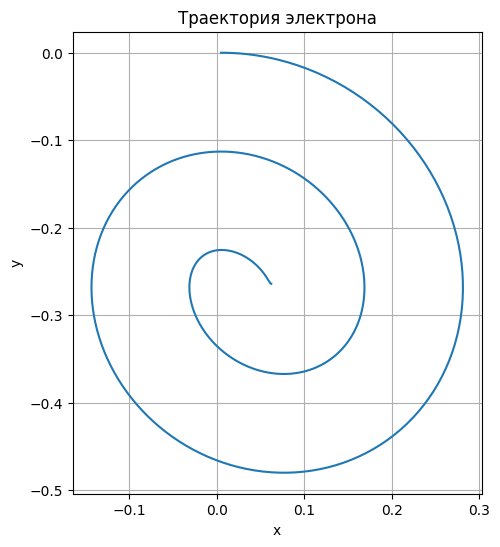

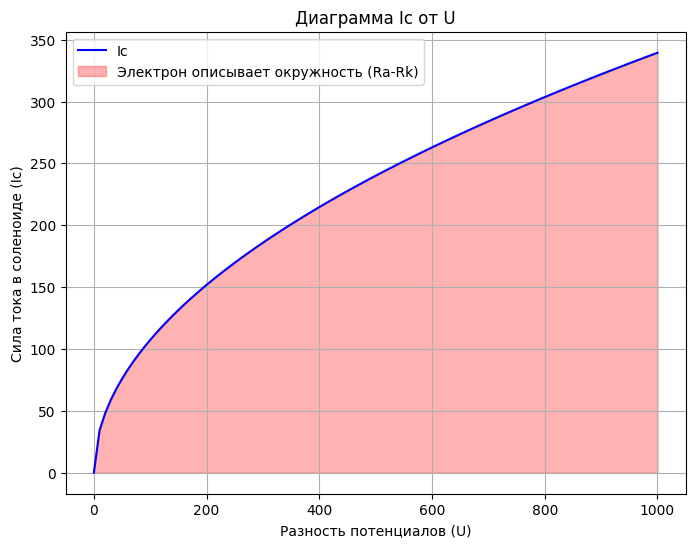

Радиус орбиты электрона: 0.2683455719615972


In [28]:
Ra = 0.01  # Радиус анода в метрах
Rk = 0.005  # Радиус катода в метрах
U = 100  # Разность потенциалов в вольтах
Ic = 1  # Начальное значение тока в соленоиде
n = 100  # Число витков на единицу длины


r_orbit = simulate_and_plot(U, Ic, Rk, stop_velocity=1e5)
plot_Ic_U_diagram_with_circle(Ra, Rk, n)

print("Радиус орбиты электрона:", r_orbit)